In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [4]:
data=pd.read_csv('TRAIN.csv')
data.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [5]:
data.drop(['Index'],axis=1,inplace=True)

In [6]:
data.tail()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
7027,19/09/2018,19,23.5,58,0.4,1836,14.7,0.0,0.0,0.0,Autumn,No Holiday,No,0
7028,19/09/2018,20,22.6,67,0.3,1737,16.1,0.0,0.0,0.0,Autumn,No Holiday,No,0
7029,19/09/2018,21,21.7,63,1.8,1078,14.3,0.0,0.1,0.0,Autumn,No Holiday,No,0
7030,19/09/2018,22,20.9,71,1.6,1057,15.4,0.0,0.1,0.0,Autumn,No Holiday,No,0
7031,19/09/2018,23,20.4,57,0.9,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,No,0


In [7]:
data.shape

(7032, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7032 non-null   object 
 1   Hour                       7032 non-null   int64  
 2   Temperature(°C)            7032 non-null   float64
 3   Humidity(%)                7032 non-null   int64  
 4   Wind speed (m/s)           7032 non-null   float64
 5   Visibility (10m)           7032 non-null   int64  
 6   Dew point temperature(°C)  7032 non-null   float64
 7   Solar Radiation (MJ/m2)    7032 non-null   float64
 8   Rainfall(mm)               7032 non-null   float64
 9   Snowfall (cm)              7032 non-null   float64
 10  Seasons                    7032 non-null   object 
 11  Holiday                    7032 non-null   object 
 12  Functioning Day            7032 non-null   object 
 13  Rented Bike Count          7032 non-null   int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour,7032.0,11.500000,6.922679,0.0,5.75,11.50,17.25,23.00
Temperature(°C),7032.0,13.154778,12.997927,-17.8,1.80,15.50,24.00,39.40
Humidity(%),7032.0,58.164960,20.637447,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),7032.0,1.785708,1.053112,0.0,1.00,1.60,2.40,7.40
Visibility (10m),7032.0,1421.082480,613.169137,27.0,918.75,1665.00,1996.00,2000.00
Dew point temperature(°C),7032.0,4.323905,14.178857,-30.6,-6.70,6.90,16.50,27.20
Solar Radiation (MJ/m2),7032.0,0.590294,0.893909,0.0,0.00,0.02,0.95,3.52
Rainfall(mm),7032.0,0.152645,1.165239,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),7032.0,0.076024,0.403487,0.0,0.00,0.00,0.00,5.10
Rented Bike Count,7032.0,689.143203,652.151786,0.0,189.75,444.00,1035.00,3556.00


In [10]:
numerical_feature=[feature for feature in data.columns if data[feature].dtype!='O']
categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
descrete_feature=[feature for feature in numerical_feature if len(data[feature].unique())<25]
continuous_feature=[feature for feature in numerical_feature if feature not in descrete_feature]

In [11]:
numerical_feature

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Rented Bike Count']

In [12]:
categorical_feature

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [13]:
descrete_feature

['Hour']

In [14]:
continuous_feature

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Rented Bike Count']

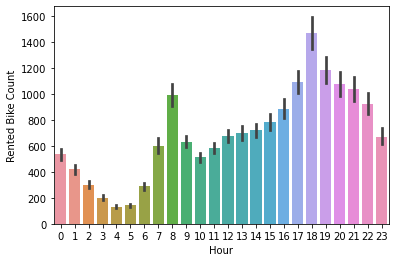

In [15]:
sns.barplot(data['Hour'],data['Rented Bike Count'])

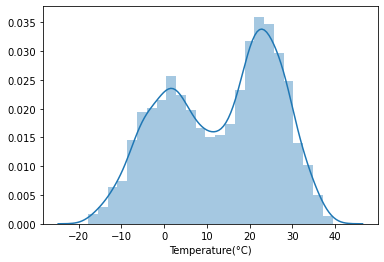

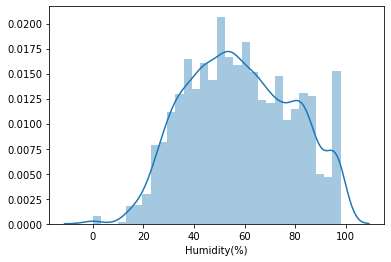

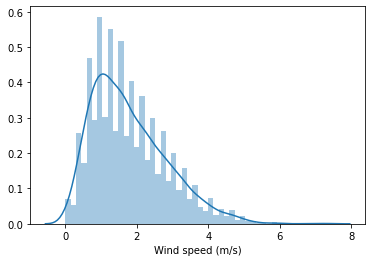

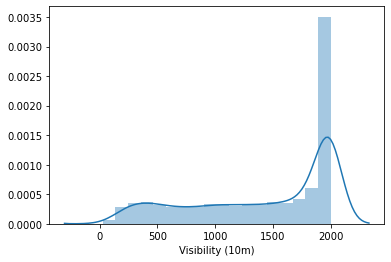

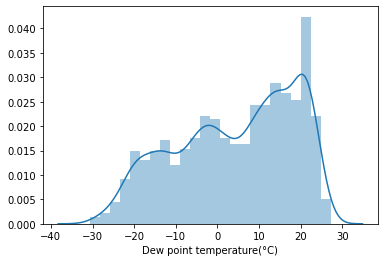

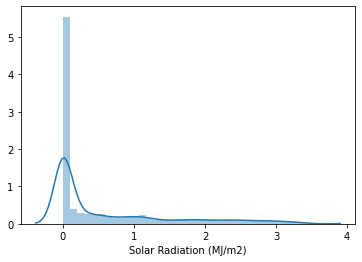

C:\Users\bhush\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


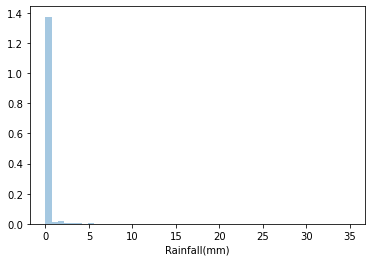

C:\Users\bhush\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


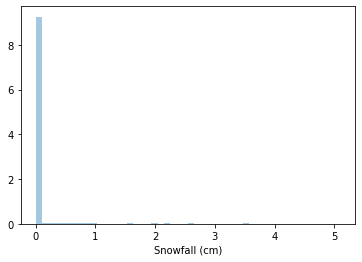

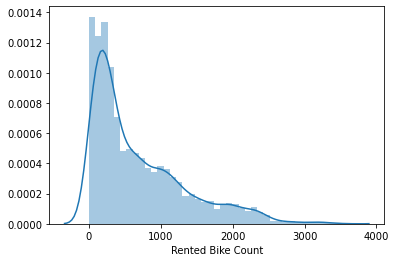

In [16]:
for feature in continuous_feature:
    sns.distplot(data[feature])
    plt.show()

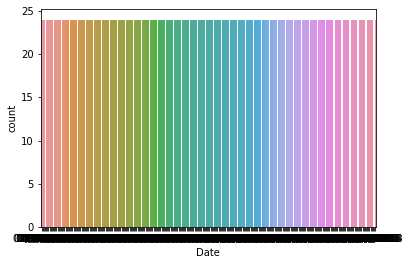

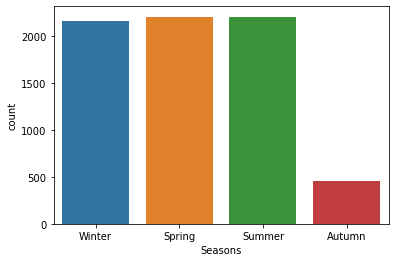

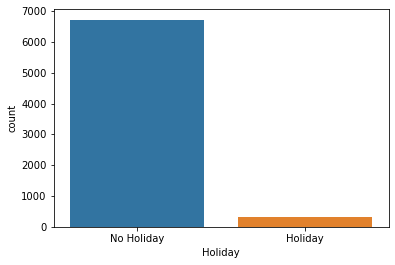

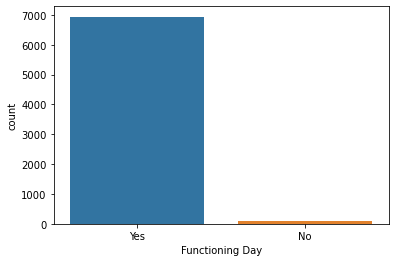

In [17]:
for feature in categorical_feature:
    sns.countplot(data[feature])
    plt.show()

In [18]:
for feature in categorical_feature:
    print(data[feature].value_counts())

31/01/2018    24
11/09/2018    24
09/07/2018    24
23/07/2018    24
02/04/2018    24
06/01/2018    24
25/04/2018    24
28/04/2018    24
15/04/2018    24
13/12/2017    24
14/09/2018    24
29/12/2017    24
07/01/2018    24
11/04/2018    24
22/05/2018    24
21/08/2018    24
11/07/2018    24
25/06/2018    24
02/01/2018    24
20/01/2018    24
28/02/2018    24
13/09/2018    24
16/04/2018    24
18/02/2018    24
18/12/2017    24
06/02/2018    24
01/08/2018    24
04/04/2018    24
27/08/2018    24
26/03/2018    24
10/03/2018    24
04/12/2017    24
02/07/2018    24
06/05/2018    24
11/08/2018    24
05/06/2018    24
15/06/2018    24
17/04/2018    24
19/01/2018    24
08/02/2018    24
10/02/2018    24
31/07/2018    24
09/03/2018    24
31/03/2018    24
07/05/2018    24
27/02/2018    24
22/06/2018    24
22/08/2018    24
02/02/2018    24
17/06/2018    24
17/08/2018    24
25/07/2018    24
26/04/2018    24
19/09/2018    24
10/09/2018    24
28/12/2017    24
23/04/2018    24
04/05/2018    24
06/04/2018    

In [19]:
data.corr()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
Hour,1.000000,0.112905,-0.225650,0.291387,0.104202,0.005241,0.150555,0.015879,-0.029747,0.399272
Temperature(°C),0.112905,1.000000,0.198452,-0.070343,0.020652,0.925673,0.348535,0.050037,-0.240413,0.583093
Humidity(%),-0.225650,0.198452,1.000000,-0.346201,-0.560678,0.542635,-0.446962,0.232779,0.086289,-0.153432
Wind speed (m/s),0.291387,-0.070343,-0.346201,1.000000,0.179382,-0.199888,0.326875,-0.040360,-0.008870,0.122481
Visibility (10m),0.104202,0.020652,-0.560678,0.179382,1.000000,-0.181288,0.155402,-0.165755,-0.104911,0.193608
Dew point temperature(°C),0.005241,0.925673,0.542635,-0.199888,-0.181288,1.000000,0.110142,0.119031,-0.179363,0.441591
Solar Radiation (MJ/m2),0.150555,0.348535,-0.446962,0.326875,0.155402,0.110142,1.000000,-0.075186,-0.084127,0.272706
Rainfall(mm),0.015879,0.050037,0.232779,-0.040360,-0.165755,0.119031,-0.075186,1.000000,-0.007367,-0.115995
Snowfall (cm),-0.029747,-0.240413,0.086289,-0.008870,-0.104911,-0.179363,-0.084127,-0.007367,1.000000,-0.156732
Rented Bike Count,0.399272,0.583093,-0.153432,0.122481,0.193608,0.441591,0.272706,-0.115995,-0.156732,1.000000


In [20]:
data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [21]:
data.head()

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78


In [22]:
data.drop(['Date'],axis=1,inplace=True)

In [23]:
df=pd.read_csv('TEST.csv')

In [24]:
df.head()

,Index,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,20/09/2018,0,20.1,58,0.3,2000,11.5,0.0,0.0,0.0,Autumn,No Holiday,Yes
1,1,20/09/2018,1,20.0,59,1.1,1999,11.7,0.0,0.0,0.0,Autumn,No Holiday,Yes
2,2,20/09/2018,2,19.9,64,1.5,1755,12.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
3,3,20/09/2018,3,19.6,72,1.7,1140,14.4,0.0,0.0,0.0,Autumn,No Holiday,Yes
4,4,20/09/2018,4,19.6,74,1.4,847,14.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [25]:
df.drop(['Index','Date'],axis=1,inplace=True)

In [26]:
dataset=pd.concat([data,df],axis=0)

In [27]:
dataset.shape

(8760, 13)

In [28]:
categorical_feature.remove('Date')

In [29]:
label = LabelEncoder()
for feature in categorical_feature:
    dataset[feature] = label.fit_transform(dataset[feature])

In [30]:
dt = pd.get_dummies(dataset, columns=categorical_feature,drop_first=True)

In [31]:
dt.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Seasons_1,Seasons_2,Seasons_3,Holiday_1,Functioning Day_1
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254.0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204.0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173.0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107.0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78.0,0,0,1,1,1


In [32]:
df_Train=dt.iloc[:7032,:]
df_Test=dt.iloc[7032:,:]

In [33]:
x=df_Train.drop(['Rented Bike Count'],axis=1)
y=df_Train['Rented Bike Count']

In [34]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_1,Seasons_2,Seasons_3,Holiday_1,Functioning Day_1
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1


In [35]:
df_Test.drop(['Rented Bike Count'],axis=1,inplace=True)

C:\Users\bhush\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
params={
    "learning_rate" : [0.01, 0.05, 0.10],
    "max_depth" : [3,10,20],
    "min_child_weight" : [1, 3, 50, 100],
    "gamma" : [0.0, 0.1,0.4],
    "colsample_bytree" : [0.3,0.5, 0.7],
    "n_estimators" : [42, 100, 400]
}

In [45]:
XGB=XGBRegressor()

In [46]:
random=GridSearchCV(XGB,param_grid=params,scoring="neg_mean_squared_error",cv=5,verbose=0)

In [ ]:

random.fit(x,y)

In [82]:
random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
XGB=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=5, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
XGB.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
pred=XGB.predict(df_Test)

In [87]:
index=np.arange(len(pred))

In [88]:
pred=pd.DataFrame(pred)
index=pd.DataFrame(index)
data=pd.concat([index,pred],axis=1)
data.columns=['Index','Rented Bike Count']
data.to_csv('submission7.csv',index=False)

In [45]:
data.to_csv('submission3.csv',index=False)

In [89]:
RF=RandomForestRegressor()
RF.fit(x,y)
pred=RF.predict(df_Test)
index=np.arange(len(pred))
pred=pd.DataFrame(pred)
index=pd.DataFrame(index)
data=pd.concat([index,pred],axis=1)
data.columns=['Index','Rented Bike Count']
data.to_csv('submission8.csv',index=False)